
The breast cancer dataset in scikit-learn helps doctors diagnose tumors in the breast. It includes information from images of cells, like their size and shape. With 569 records and 30 columns for each, it's perfect for deciding if a tumor is cancerous or not. Using decision tree algorithm , created a model to predict the diagnosis.

Initially, we made a DecisionTreeClassifier model to predict breast cancer, and it was pretty good, with an accuracy of 0.936. However, to further enhance its model performance, parameter tuning using GridSearchCV was used. The best parameters identified were {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}. Utilizing these optimal parameters, a new model was constructed. The improved accuracy is 0.959.

### Step 1: Import Required Libraries

In [18]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Step 2: Load Dataset:

In [19]:
# Load breast cancer dataset
data = load_breast_cancer()

# Convert to DataFrame
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target

print("Shape of DataFrame:", df_cancer.shape)

df_cancer.info()

Shape of DataFrame: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 

In [20]:
# Check for null values in each column
null_counts = df_cancer.isnull().sum()

# Sort null value counts in descending order
null_counts_sorted = null_counts.sort_values(ascending=False)

print("Null value counts in each column:")
print(null_counts)

Null value counts in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [21]:
X = df_cancer.drop(columns=['target'])
Y = df_cancer['target']

### Step 3: Split Dataset:

In [22]:
# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


### Step 4: Create Decision Tree Classifier:

In [23]:
# Initialize a decision tree classifier
clf = DecisionTreeClassifier()


### Step 5: Train the Model:

In [24]:
#Fit the classifier to the training data:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Step 6: Make Predictions:

In [25]:
# Use the trained model to make predictions on the test set
y_pred = clf.predict(X_test)

### Step 7: Evaluate the Model:

In [26]:
# Assess the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 

Accuracy: 0.9298245614035088


### Step 8: Parameter Tuning

To add parameter tuning to the decision tree classifier, we use a technique called grid search.

In [27]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Step 9: Train the model with the best parameters

In [29]:
# Train the model with the best parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

### Step 10: Make predictions

In [30]:
# Make predictions
y_pred = best_clf.predict(X_test)

### Step 11: Evaluate the model

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [32]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 59   4]
 [  2 106]]


True negatives (TN) are 58, indicating that 58 instances of class 0 were correctly predicted as class 0.
False positives (FP) are 5, indicating that 5 instances of class 0 were incorrectly predicted as class 1.
False negatives (FN) are 2, indicating that 2 instances of class 1 were incorrectly predicted as class 0.
True positives (TP) are 106, indicating that 106 instances of class 1 were correctly predicted as class 1.

In [33]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### Step 12:  Plot the decision tree

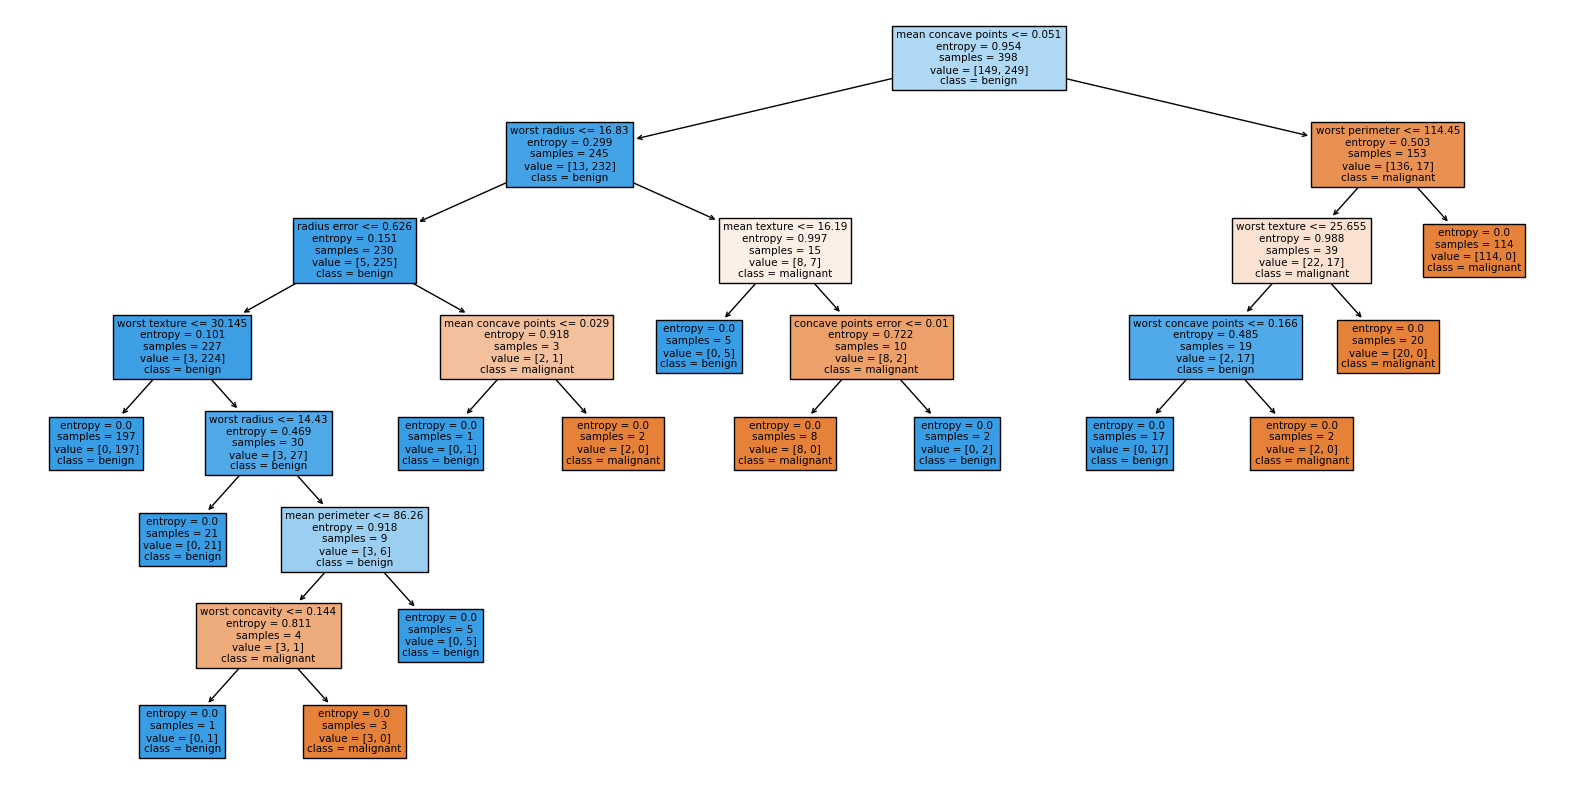

In [34]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()